## Eye Disease Detection - Deep Learning Project

### Loading Tensorflow

In [ ]:
import tensorflow as tf

### Creating the kaggle Directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

### Loading dataset into colab using Kaggle API

In [ ]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

 99% 731M/736M [00:05<00:00, 152MB/s]
100% 736M/736M [00:05<00:00, 143MB/s]


### Unzip the dataset

In [ ]:
!unzip 'eye-diseases-classification.zip'

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

### Count of Image Categories

In [ ]:
import os
def count_files(directory):
    count = 0
    for _, _, files in os.walk(directory):    # os.walk gives us 3 things: dirpath, dirnames, filenames: we dont want the first 2 so we have put _,
        count += len(files)    # counting the length of folders
    return count

dataset_path = '/content/dataset/cataract'
total_images = count_files(dataset_path)
print("Total number of images of cataract:", total_images)

dataset_path = '/content/dataset/diabetic_retinopathy'
total_images = count_files(dataset_path)
print("Total number of images of diabetic_retinopathy:", total_images)

dataset_path = '/content/dataset/glaucoma'
total_images = count_files(dataset_path)
print("Total number of images of glaucoma:", total_images)

dataset_path = '/content/dataset/normal'
total_images = count_files(dataset_path)
print("Total number of images of normal:", total_images)

Total number of images of cataract: 1038
Total number of images of diabetic_retinopathy: 1098
Total number of images of glaucoma: 1007
Total number of images of normal: 1074


### Visualizing the count

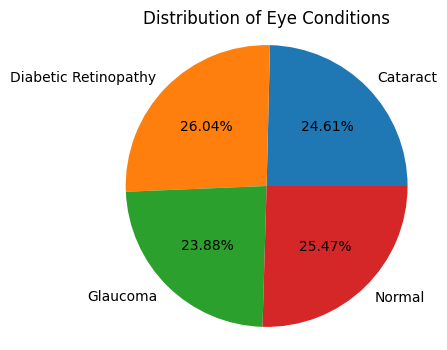

In [ ]:
import matplotlib.pyplot as plt

labels = ['Cataract','Diabetic Retinopathy', 'Glaucoma', 'Normal']
sizes = [1038,1098, 1007, 1074]

plt.figure(figsize=(4, 4))
plt.pie(sizes,autopct='%.2f%%',labels=labels)

plt.title('Distribution of Eye Conditions')
plt.axis('equal')
plt.show()

### Ploting the Eye Images

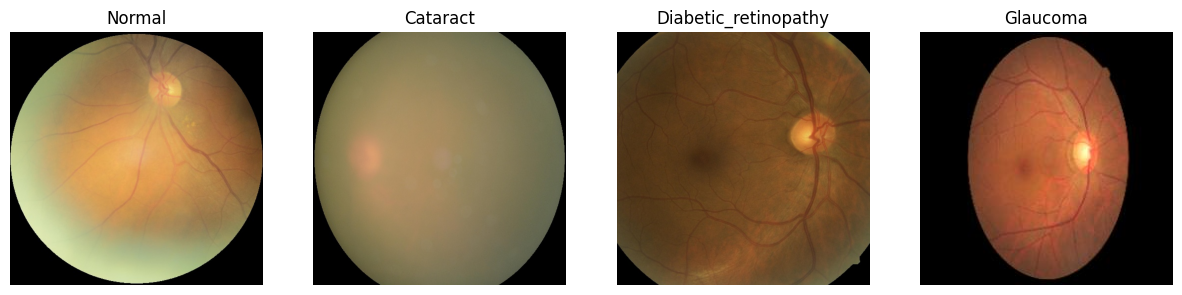

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_dir = '/content/dataset'
categories = ['normal', 'cataract', 'diabetic_retinopathy', 'glaucoma']


def display_images_from_categories(dataset_dir, categories):
    fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

    for i, category in enumerate(categories):

        category_dir = os.path.join(dataset_dir, category)
        image_files = os.listdir(category_dir)


        image_path = os.path.join(category_dir, image_files[0])


        image = Image.open(image_path)
        axs[i].imshow(image)
        axs[i].set_title(category.capitalize())
        axs[i].axis('off')

    plt.show()

display_images_from_categories(dataset_dir, categories)

## Image Pre-Processing

### 1. Image Resize

In [ ]:
import os
from PIL import Image

def resize_images(input_dirs, output_dir, target_size):
    os.makedirs(output_dir, exist_ok=True)

    for input_dir in input_dirs:
        category_name = os.path.basename(input_dir)

        for filename in os.listdir(input_dir):
            if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                img_path = os.path.join(input_dir, filename)
                print(f"Processing image: {img_path}")

                try:
                    img = Image.open(img_path)
                    resized_img = img.resize(target_size, Image.ANTIALIAS)

                    output_filename = f"resized_{filename}"
                    output_path = os.path.join(output_dir, category_name, output_filename)
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)
                    resized_img.save(output_path)

                    print(f"Resized and saved: {filename} -> {output_path}")
                except Exception as e:
                    print(f"Error processing {filename}: {e}")


cataract='/content/dataset/cataract'
diabetic='/content/dataset/diabetic_retinopathy'
glaucoma='/content/dataset/glaucoma'
normal='/content/dataset/normal'
input_dirs = [cataract,diabetic,glaucoma,normal]
output_directory = '/content/dataset/resized_img'
target_image_size = (256, 256)
resize_images(input_dirs, output_directory, target_image_size)

Processing image: /content/dataset/cataract/_241_6604562.jpg
Resized and saved: _241_6604562.jpg -> /content/dataset/resized_img/cataract/resized__241_6604562.jpg
Processing image: /content/dataset/cataract/_68_132563.jpg
Resized and saved: _68_132563.jpg -> /content/dataset/resized_img/cataract/resized__68_132563.jpg
Processing image: /content/dataset/cataract/_101_709333.jpg
Resized and saved: _101_709333.jpg -> /content/dataset/resized_img/cataract/resized__101_709333.jpg
Processing image: /content/dataset/cataract/cataract_005.png
Resized and saved: cataract_005.png -> /content/dataset/resized_img/cataract/resized_cataract_005.png
Processing image: /content/dataset/cataract/_7_2330751.jpg
Resized and saved: _7_2330751.jpg -> /content/dataset/resized_img/cataract/resized__7_2330751.jpg
Processing image: /content/dataset/cataract/_23_9533792.jpg
Resized and saved: _23_9533792.jpg -> /content/dataset/resized_img/cataract/resized__23_9533792.jpg
Processing image: /content/dataset/catar

<ipython-input-5-33eb4903bba8>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


Streaming output truncated to the last 5000 lines.
Processing image: /content/dataset/diabetic_retinopathy/10377_right.jpeg
Resized and saved: 10377_right.jpeg -> /content/dataset/resized_img/diabetic_retinopathy/resized_10377_right.jpeg
Processing image: /content/dataset/diabetic_retinopathy/1196_right.jpeg
Resized and saved: 1196_right.jpeg -> /content/dataset/resized_img/diabetic_retinopathy/resized_1196_right.jpeg
Processing image: /content/dataset/diabetic_retinopathy/11288_left.jpeg
Resized and saved: 11288_left.jpeg -> /content/dataset/resized_img/diabetic_retinopathy/resized_11288_left.jpeg
Processing image: /content/dataset/diabetic_retinopathy/10319_right.jpeg
Resized and saved: 10319_right.jpeg -> /content/dataset/resized_img/diabetic_retinopathy/resized_10319_right.jpeg
Processing image: /content/dataset/diabetic_retinopathy/10404_right.jpeg
Resized and saved: 10404_right.jpeg -> /content/dataset/resized_img/diabetic_retinopathy/resized_10404_right.jpeg
Processing image: /c

## Ploting Eye Image after resizing

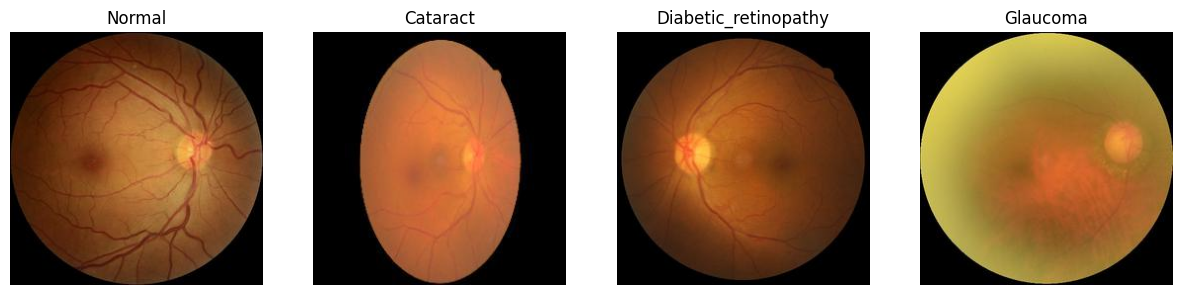

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_dir = '/content/dataset/resized_img'
categories = ['normal', 'cataract', 'diabetic_retinopathy', 'glaucoma']


def display_images_from_categories(dataset_dir, categories):
    fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

    for i, category in enumerate(categories):

        category_dir = os.path.join(dataset_dir, category)
        image_files = os.listdir(category_dir)


        image_path = os.path.join(category_dir, image_files[0])


        image = Image.open(image_path)
        axs[i].imshow(image)
        axs[i].set_title(category.capitalize())
        axs[i].axis('off')

    plt.show()

display_images_from_categories(dataset_dir, categories)

## Creating 2 Files (Train and Test)

In [ ]:
import os
import random
import shutil

def split_dataset(dataset_dir, train_dir, test_dir, categories, test_size=0.2, random_state=42):
    random.seed(random_state)

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for category in categories:
        category_dir = os.path.join(dataset_dir, category)
        if not os.path.isdir(category_dir):
            print(f"Warning: Category '{category}' directory not found.")
            continue

        image_files = [f for f in os.listdir(category_dir) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]
        num_images = len(image_files)
        num_test_images = int(test_size * num_images)

        test_images = random.sample(image_files, num_test_images)
        train_images = [f for f in image_files if f not in test_images]


        for img in train_images:
            src_path = os.path.join(category_dir, img)
            dst_path = os.path.join(train_dir, category, img)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)


        for img in test_images:
            src_path = os.path.join(category_dir, img)
            dst_path = os.path.join(test_dir, category, img)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)

# paths and categories
dataset_dir = '/content/dataset/resized_img'
train_dir = '/content/dataset/resized_img/train'
test_dir = '/content/dataset/resized_img/test'
categories = ['normal', 'cataract', 'diabetic_retinopathy', 'glaucoma']

# Call the function to split dataset into train and test sets
split_dataset(dataset_dir, train_dir, test_dir, categories, test_size=0.2, random_state=42)

## Checking the shape of train and test files

In [ ]:
import os
train_catract = '/content/dataset/resized_img/train/cataract'
train_diabetic ='/content/dataset/resized_img/train/diabetic_retinopathy'
train_galucoma ='/content/dataset/resized_img/train/glaucoma'
train_normal ='/content/dataset/resized_img/train/normal'
test_catract = '/content/dataset/resized_img/test/cataract'
test_diabetic = '/content/dataset/resized_img/test/diabetic_retinopathy'
test_galucoma ='/content/dataset/resized_img/test/glaucoma'
test_normal ='/content/dataset/resized_img/test/normal'
# function to count files in a directory
def count_files(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

print('Train Dataset: 3376')
print("Catract :", count_files(train_catract))
print("Diabetic_retinopathy :", count_files(train_diabetic))
print("Glaucoma :", count_files(train_galucoma))
print("Normal :", count_files(train_normal))

print('\nTest Dataset: 841')
print("Catract :", count_files(test_catract))
print("Diabetic_retinopathy :", count_files(test_diabetic))
print("Glaucoma :", count_files(test_galucoma))
print("Normal :", count_files(test_normal))

Train Dataset: 3376
Catract : 831
Diabetic_retinopathy : 879
Glaucoma : 806
Normal : 860

Test Dataset: 841
Catract : 207
Diabetic_retinopathy : 219
Glaucoma : 201
Normal : 214


## 2. Normalization and ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to [0, 1]
    shear_range=0.2,        # Apply shear transformation with a range of 0.2
    zoom_range=0.2,         # Apply zoom transformation with a range of 0.2
    horizontal_flip=True   # Randomly flip images horizontally
)

# ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(
    rescale=1./255          # Rescale pixel values to [0, 1]
)

In [ ]:
x_train = train_datagen.flow_from_directory(
    r'/content/dataset/resized_img/train',  # Path to the directory
    target_size=(64, 64),                   # Resize images to 64x64 pixels
    batch_size=32,
    class_mode='categorical'                # Use categorical labels (one-hot encoded)
)

x_test = test_datagen.flow_from_directory(
    r'/content/dataset/resized_img/test',   # Path to the directory
    target_size=(64, 64),                   # Resize images to 64x64 pixels
    batch_size=32,
    class_mode='categorical'                # Use categorical labels (one-hot encoded)
)

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [ ]:
x_train.class_indices

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [ ]:
x_test.class_indices

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

# Model Building

## 1. CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop


# Define the CNN model architecture
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten the output and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',kernel_initializer='random_uniform'))
    model.add(layers.Dense(num_classes, activation='softmax',))  # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])
    return model

input_shape = (64, 64, 3)
num_classes = 4

cnn_model = create_cnn_model(input_shape, num_classes)

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

## Model Training

In [ ]:
eye_detection = cnn_model.fit_generator(
    x_train,                  # Training data generator
    steps_per_epoch=len(x_train),       # Number of batches
    epochs=80,                # Number of epochs
    validation_data=x_test,
    validation_steps=len(x_test)       # Number of batches to yield from the validation generator per epoch
)

Epoch 1/80
106/106 [==============================] - 32s 283ms/step - loss: 1.1866 - accuracy: 0.4502 - val_loss: 0.9764 - val_accuracy: 0.5743
Epoch 2/80
106/106 [==============================] - 27s 254ms/step - loss: 0.9651 - accuracy: 0.5841 - val_loss: 0.8323 - val_accuracy: 0.6528
Epoch 3/80
106/106 [==============================] - 27s 255ms/step - loss: 0.8579 - accuracy: 0.6431 - val_loss: 0.7694 - val_accuracy: 0.6897
Epoch 4/80
106/106 [==============================] - 27s 254ms/step - loss: 0.7859 - accuracy: 0.6718 - val_loss: 0.6796 - val_accuracy: 0.7182
Epoch 5/80
106/106 [==============================] - 27s 257ms/step - loss: 0.7261 - accuracy: 0.7014 - val_loss: 0.7220 - val_accuracy: 0.7039
Epoch 6/80
106/106 [==============================] - 27s 255ms/step - loss: 0.6921 - accuracy: 0.7207 - val_loss: 0.7638 - val_accuracy: 0.6790
Epoch 7/80
106/106 [==============================] - 27s 253ms/step - loss: 0.6499 - accuracy: 0.7346 - val_loss: 0.6730 - val_ac

## Model Evaluation

In [ ]:
results = cnn_model.evaluate(x_test)

27/27 [==============================] - 2s 64ms/step - loss: 0.5038 - accuracy: 0.8573


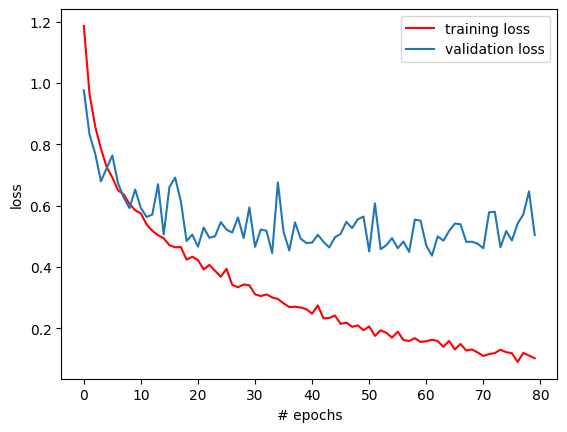

In [ ]:
from matplotlib import pyplot as plt

plt.plot(eye_detection.history['loss'],'r',label='training loss')
plt.plot(eye_detection.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

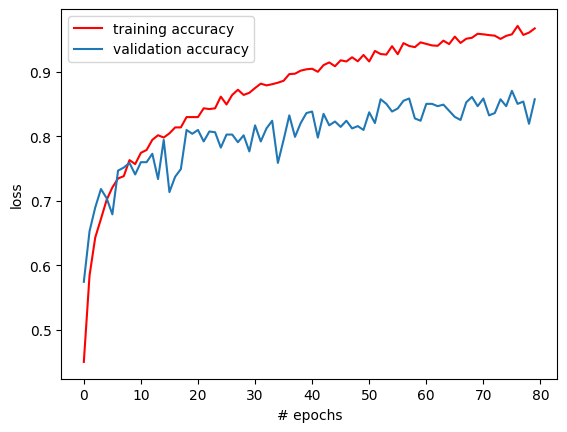

In [ ]:
plt.plot(eye_detection.history['accuracy'],'r',label='training accuracy')
plt.plot(eye_detection.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
eye_detection.model.save("eye_cnn.h5")

## Checking Model Predictions

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model("eye_cnn.h5")

In [ ]:
##{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}
import numpy as np
img=image.load_img('/content/dataset/resized_img/cataract/resized_1062_right.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
p=np.argmax(pred)
p

1/1 [==============================] - 0s 22ms/step


0

#2. Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception

In [ ]:
input_shape = (299, 299, 3)
num_classes = 4
batch_size = 32
epochs = 60

In [ ]:
# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
x_train = train_datagen.flow_from_directory(
    '/content/dataset/resized_img/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

x_test = test_datagen.flow_from_directory(
    '/content/dataset/resized_img/test',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
# Train the model
xception_model = model.fit(
    x_train,
    steps_per_epoch=50,
    epochs=epochs,
    validation_data=x_test,
    validation_steps=len(x_test)
)

Epoch 1/60
50/50 [==============================] - 58s 959ms/step - loss: 0.7989 - accuracy: 0.6706 - val_loss: 0.7437 - val_accuracy: 0.6897
Epoch 2/60
50/50 [==============================] - 49s 975ms/step - loss: 0.5776 - accuracy: 0.7797 - val_loss: 0.7533 - val_accuracy: 0.7039
Epoch 3/60
50/50 [==============================] - 44s 879ms/step - loss: 0.5394 - accuracy: 0.7775 - val_loss: 0.7192 - val_accuracy: 0.7134
Epoch 4/60
50/50 [==============================] - 43s 864ms/step - loss: 0.5255 - accuracy: 0.8024 - val_loss: 0.6877 - val_accuracy: 0.7194
Epoch 5/60
50/50 [==============================] - 47s 952ms/step - loss: 0.5268 - accuracy: 0.7956 - val_loss: 0.8250 - val_accuracy: 0.6564
Epoch 6/60
50/50 [==============================] - 48s 954ms/step - loss: 0.4820 - accuracy: 0.8106 - val_loss: 0.7632 - val_accuracy: 0.6932
Epoch 7/60
50/50 [==============================] - 47s 940ms/step - loss: 0.4778 - accuracy: 0.8019 - val_loss: 0.6587 - val_accuracy: 0.7348

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, steps=len(x_test))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

27/27 [==============================] - 7s 238ms/step - loss: 0.6206 - accuracy: 0.7551
Test Loss: 0.6206058859825134
Test Accuracy: 0.7550535202026367


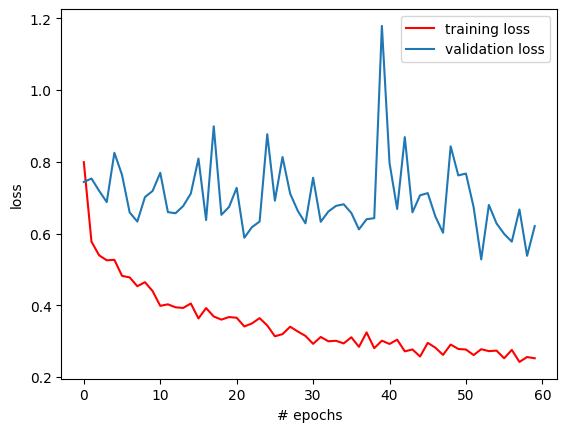

In [ ]:
from matplotlib import pyplot as plt

plt.plot(xception_model.history['loss'],'r',label='training loss')
plt.plot(xception_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

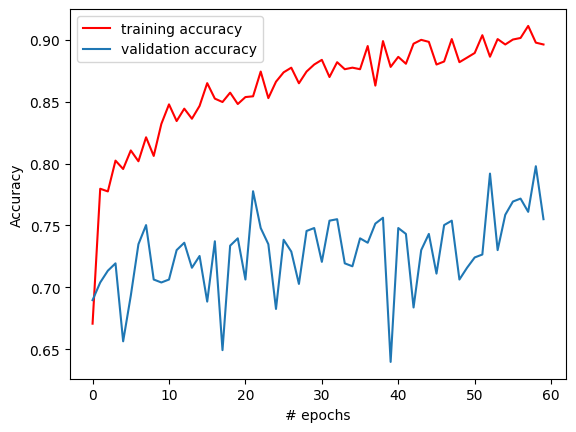

In [ ]:
plt.plot(xception_model.history['accuracy'],'r',label='training accuracy')
plt.plot(xception_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
xception_model.model.save("eye_xception_new.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/eye_xception_new.h5')

In [ ]:
##{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}
import numpy as np
img=image.load_img('/content/dataset/cataract/1083_left.jpg',target_size=(299,299))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
p=np.argmax(pred)
p

1/1 [==============================] - 2s 2s/step


0

# 3. VGG 19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG19(include_top=False,input_shape=(64,64,3),weights='imagenet')

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
output = Dense(4,activation='softmax')(x)

In [ ]:
vgg19 = Model(vgg.input,output)

In [ ]:
vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.001)
vgg19.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
vgg_detection=vgg19.fit(x_train,validation_data=x_test,epochs=50,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/50
106/106 [==============================] - 14s 101ms/step - loss: 1.0338 - accuracy: 0.5672 - val_loss: 0.8727 - val_accuracy: 0.6599
Epoch 2/50
106/106 [==============================] - 9s 80ms/step - loss: 0.8460 - accuracy: 0.6632 - val_loss: 0.8773 - val_accuracy: 0.6718
Epoch 3/50
106/106 [==============================] - 9s 87ms/step - loss: 0.8025 - accuracy: 0.6721 - val_loss: 0.7989 - val_accuracy: 0.6778
Epoch 4/50
106/106 [==============================] - 13s 119ms/step - loss: 0.7726 - accuracy: 0.6928 - val_loss: 0.7405 - val_accuracy: 0.7182
Epoch 5/50
106/106 [==============================] - 9s 86ms/step - loss: 0.7297 - accuracy: 0.7118 - val_loss: 0.7075 - val_accuracy: 0.7372
Epoch 6/50
106/106 [==============================] - 15s 144ms/step - loss: 0.7372 - accuracy: 0.6993 - val_loss: 0.7646 - val_accuracy: 0.7063
Epoch 7/50
106/106 [==============================] - 9s 88ms/step - loss: 0.7120 - accuracy: 0.7216 - val_loss: 0.7307 - val_accuracy: 

In [ ]:
results_vgg=vgg19.evaluate(x_test)

27/27 [==============================] - 1s 31ms/step - loss: 0.6700 - accuracy: 0.7360


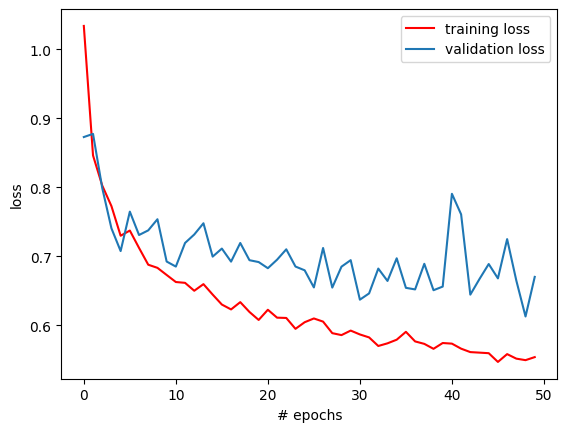

In [ ]:
import matplotlib.pyplot as plt
plt.plot(vgg_detection.history['loss'], 'r', label='training loss')
plt.plot(vgg_detection.history['val_loss'], label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

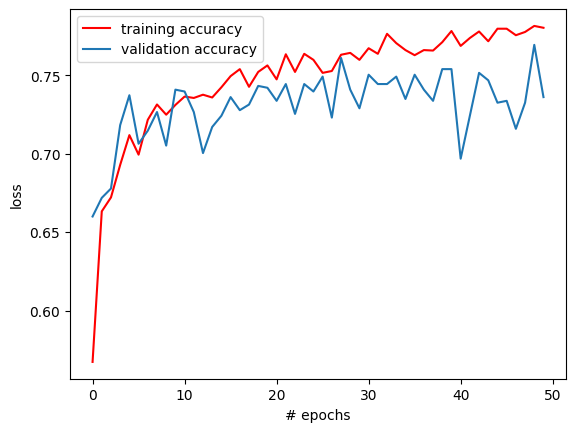

In [ ]:
plt.plot(vgg_detection.history['accuracy'],'r',label='training accuracy')
plt.plot(vgg_detection.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
vgg_detection.model.save("eye_vgg.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 4. InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
input_shape = (299, 299, 3)
num_classes = 4
batch_size = 32
epochs = 50

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    '/content/dataset/resized_img/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test = test_datagen.flow_from_directory(
    '/content/dataset/resized_img/test',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [ ]:
# Load pre-trained Inception model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
detection_inception = model.fit(train, steps_per_epoch=50, epochs=epochs, validation_data=test, validation_steps=len(test))

Epoch 1/50
50/50 [==============================] - 60s 962ms/step - loss: 0.9110 - accuracy: 0.6010 - val_loss: 0.7476 - val_accuracy: 0.6920
Epoch 2/50
50/50 [==============================] - 42s 844ms/step - loss: 0.6846 - accuracy: 0.7298 - val_loss: 0.8186 - val_accuracy: 0.6302
Epoch 3/50
50/50 [==============================] - 44s 876ms/step - loss: 0.6304 - accuracy: 0.7281 - val_loss: 0.7140 - val_accuracy: 0.7194
Epoch 4/50
50/50 [==============================] - 49s 976ms/step - loss: 0.5613 - accuracy: 0.7753 - val_loss: 0.7586 - val_accuracy: 0.6956
Epoch 5/50
50/50 [==============================] - 44s 877ms/step - loss: 0.6033 - accuracy: 0.7631 - val_loss: 0.6889 - val_accuracy: 0.7122
Epoch 6/50
50/50 [==============================] - 44s 874ms/step - loss: 0.5661 - accuracy: 0.7675 - val_loss: 0.6401 - val_accuracy: 0.7467
Epoch 7/50
50/50 [==============================] - 44s 876ms/step - loss: 0.5265 - accuracy: 0.7881 - val_loss: 0.6220 - val_accuracy: 0.7634

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test, steps=len(test))
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

27/27 [==============================] - 4s 131ms/step - loss: 0.7187 - accuracy: 0.7372

Test Loss: 0.7187254428863525
Test Accuracy: 0.7372176051139832


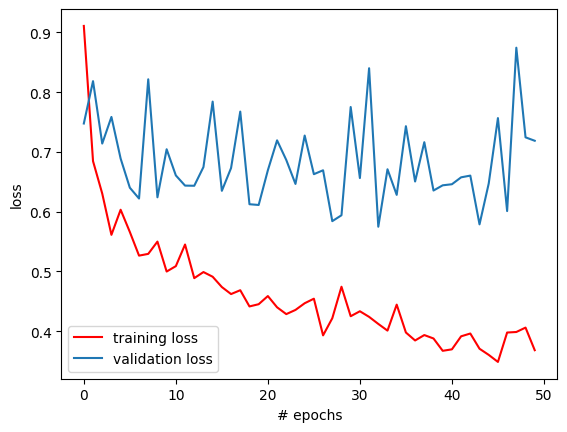

In [ ]:
import matplotlib.pyplot as plt
plt.plot(detection_inception.history['loss'], 'r', label='training loss')
plt.plot(detection_inception.history['val_loss'], label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

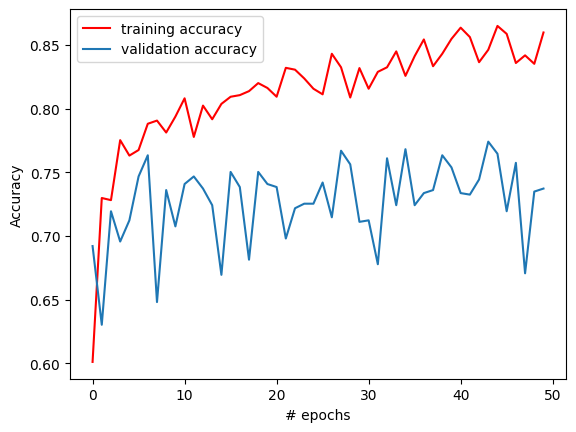

In [ ]:
plt.plot(detection_inception.history['accuracy'],'r',label='training accuracy')
plt.plot(detection_inception.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
detection_inception.model.save("eye_inception.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Out of all this 4 model we have selected CNN for prediction bcz it gave best accuracy among all of them